# ** Loading the Digits Dataset**
*Author: OJotham*

In [1]:
import os
import pandas as pd

home_folder = os.path.expanduser("~")
data_folder = os.path.join(home_folder, "Documents", "ClassificationChallenge", "challenge1_HowCrispCanYouClassify", "data")
digits_train = os.path.join(data_folder, "digits_train.csv")


## Data exploration and visualization

In [2]:
train_values = pd.read_csv(digits_train)
train_values.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,labels
0,0,0,0,2,12,3,0,0,0,0,...,0,0,0,1,15,16,13,4,0,6
1,1,0,0,13,13,13,12,4,0,0,...,0,0,1,9,14,15,4,0,0,5
2,2,0,0,0,12,8,0,6,3,0,...,0,0,0,0,12,6,0,0,0,4
3,3,0,0,1,11,10,0,0,0,0,...,0,0,0,0,13,8,0,0,0,9
4,4,0,0,1,10,14,13,2,0,0,...,0,0,0,0,14,2,0,0,0,7


In [4]:
train_values.shape

(4000, 66)

In [5]:
train_values.plot.scatter('1','6')

C:\Users\Jotham\Miniconda3\Lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.
  


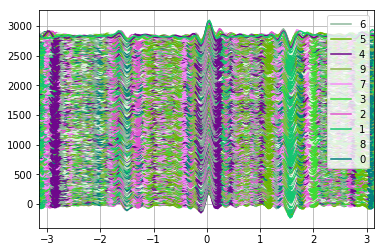

In [6]:
from pandas.tools.plotting import andrews_curves
andrews_curves(train_values, 'labels')

In [7]:
from sklearn.manifold import Isomap

iso = Isomap(n_components = 2)
train_transform = iso.fit_transform(train_values)
train_transform.shape

(4000, 2)

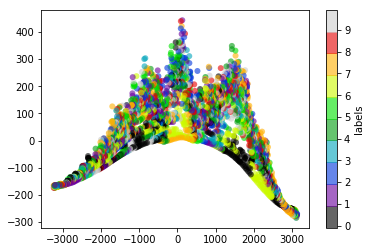

In [8]:
import matplotlib.pyplot as plt

digits_target = train_values['labels']
plt.scatter(train_transform[:,0], train_transform[:,1], c=digits_target, edgecolor = 'none', alpha = 0.6, cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label = 'labels', ticks=range(10))
plt.clim(-0.1, 9.9)

## Instantiating the Logregression classifier and prediction

In [9]:
from sklearn.linear_model import LogisticRegression

#load the test values
digits_test = os.path.join(data_folder, "digits_test.csv")
test_values = pd.read_csv(digits_test)
#drop the target column
x_train = train_values.drop(train_values.columns[[65]], axis = 1)
#get classifier object
logr_clf = LogisticRegression()
#train the classifier
logr_clf.fit(x_train,digits_target)
logr_results = logr_clf.predict(test_values)
print(logr_results)

[6 3 9 ..., 0 6 2]


In [10]:
logr_score = logr_clf.score(x_train,digits_target)
print("The LogisticRegression algorithm achieved an accuracy of {:.2f} % on the training dataset".format(logr_score*100))

The LogisticRegression algorithm achieved an accuracy of 97.85 % on the training dataset


## Using Support Vector Machines

In [11]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(x_train, digits_target)
svm_results = svm_clf.predict(test_values)

In [12]:
svm_score = svm_clf.score(x_train,digits_target)
print("The Support Vector Machines algorithm achieved an accuracy of {:.2f} % on the training dataset".format(svm_score*100))

The Support Vector Machines algorithm achieved an accuracy of 100.00 % on the training dataset


In [17]:
logr_results = pd.DataFrame(logr_results)
logr_results.columns = ["labels"]

logr_results.to_csv("digit_test_labelled.csv")